# Airbnb-Price-Prediction-ML-Model

In [30]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# File names of the four data sets
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [32]:
# YOUR CODE HERE
print(df.columns)
print(df.describe())

print(df.isnull().sum())

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import time

In [34]:
# Handle missing values (example: fill with mean for numerical)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isnull().sum())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                        

In [35]:
unique_value_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':
        unique_value_counts[col] = df[col].nunique()
print(unique_value_counts)

{'name': 27386, 'description': 25952, 'neighborhood_overview': 15800, 'host_name': 7566, 'host_location': 1364, 'host_about': 11962, 'neighbourhood_group_cleansed': 5, 'room_type': 4, 'amenities': 25020}


In [36]:
categorical_columns = ['neighbourhood_group_cleansed', 'room_type']

for feature in categorical_columns:
    print("Unique values of", feature, ":")
    print(df[feature].unique())
    print() 

Unique values of neighbourhood_group_cleansed :
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']

Unique values of room_type :
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']



In [37]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
# Create the Scikit-learn OneHotEncoder object below and assign to variable 'enc'.
# When calling OneHotEncoder(), specify that the 'sparse_output' parameter is True (default)
enc = OneHotEncoder(sparse_output=True)

# Apply the encoder:
# Use the method 'enc.fit_transform()' to fit the encoder to the data (the categorical columns) and transform the data into 
# one-hot encoded values
# The result will be a sparse matrix
df_enc_sparse = enc.fit_transform(df[categorical_columns])

# Convert the sparse matrix to a DataFrame (if necessary)
df_enc = pd.DataFrame.sparse.from_spmatrix(df_enc_sparse, columns=enc.get_feature_names_out(categorical_columns))

# Check the first few rows of the resulting DataFrame
print(df_enc.head())


   neighbourhood_group_cleansed_Bronx  neighbourhood_group_cleansed_Brooklyn  \
0                                 0.0                                    0.0   
1                                 0.0                                    1.0   
2                                 0.0                                    1.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   neighbourhood_group_cleansed_Manhattan  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   

   neighbourhood_group_cleansed_Queens  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0

In [38]:
df_enc.columns = enc.get_feature_names_out(categorical_columns)
df_enc.head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df = df.drop(columns=categorical_columns)
df = pd.concat([df, df_enc], axis=1)  #transformed features contained in `df_enc` with DataFrame `df`
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [40]:
object_columns = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(columns=object_columns)
# Update df to exclude object columns
df = df_numeric 

In [41]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.800000,0.170000,True,8.0,8.0,True,True,1,1.0,1.329708,...,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.090000,0.690000,True,1.0,1.0,True,True,3,1.0,1.000000,...,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.250000,True,1.0,1.0,True,True,4,1.5,2.000000,...,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,1.000000,True,1.0,1.0,True,True,2,1.0,1.000000,...,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.906901,0.791953,True,1.0,1.0,True,True,1,1.0,1.000000,...,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# working with Keras, features should have floating point values.
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(float)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.800000,0.170000,1.0,8.0,8.0,1.0,1.0,1,1.0,1.329708,...,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.090000,0.690000,1.0,1.0,1.0,1.0,1.0,3,1.0,1.000000,...,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.250000,1.0,1.0,1.0,1.0,1.0,4,1.5,2.000000,...,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,2,1.0,1.000000,...,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.906901,0.791953,1.0,1.0,1.0,1.0,1.0,1,1.0,1.000000,...,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
X = df.drop(columns = 'price', axis=1)
y = df['price']

In [44]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/utils/validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [50]:
def build_model():
    # Build the Neural Network
    # 1. Create model object:
    nn_model = keras.Sequential()
    
    
    # 2. Create the input layer and add it to the model object: 
    # Create input layer:
    input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1],))
    # Add input_layer to the model object:
    # YOUR CODE HERE
    nn_model.add(input_layer)
    
    
    # 3. Create the first hidden layer and add it to the model object:
    # Create hidden layer:
    hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
    # Add hidden_layer_1 to the model object:
    # YOUR CODE HERE
    nn_model.add(hidden_layer_1)
    
    
    # 4. Create the second hidden layer and add it to the model object:
    # Create hidden layer:
    hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
    # Add hidden_layer_2 to the model object:
    # YOUR CODE HERE
    nn_model.add(hidden_layer_2)
    
    
    # 5. Create the third hidden layer and add it to the model object:
    # Create hidden layer:
    hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
    # Add hidden_layer_3 to the model object:
    # YOUR CODE HERE
    nn_model.add(hidden_layer_3)
    
    # 6. Create the output layer and add it to the model object:
    # Create output layer:
    output_layer = keras.layers.Dense(units=1, activation='linear')  # Use 'linear' activation for regression
    # Add output_layer to the model object:
    # YOUR CODE HERE
    nn_model.add(output_layer)
    
    # Set up optimizer and loss function for regression
    adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Use Adam optimizer
    loss_fn = keras.losses.MeanSquaredError()  # Use Mean Squared Error for regression
    nn_model.compile(optimizer=adam_optimizer, loss=loss_fn, metrics=['mae'])  # Use Mean Absolute Error as a metric
    return nn_model


# Wrap Keras model for use with scikit-learn
nn_model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=32, verbose=0)  # Reduce epochs for faster testing


In [51]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1234)
cross_val_scores = cross_val_score(nn_model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')

# Output results
print("Cross-Validation Scores: ", -cross_val_scores)
print("Mean Cross-Validation Score: ", -cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())


Cross-Validation Scores:  [51.62594776 60.55752568 51.47493205 51.8868169  51.5024271 ]
Mean Cross-Validation Score:  53.409529896915515
Standard Deviation of Cross-Validation Scores:  3.5769644603577158


In [52]:
# Custom callback to log progress
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

Epoch [10/ 50], Loss: 2540118212608.0000, Mae: 30487.7930, Val_loss: 12921659.0000, Val_mae: 176.6889
Epoch [20/ 50], Loss: 565113.5000, Mae: 73.8467, Val_loss: 14009.7842, Val_mae: 63.7777
Epoch [30/ 50], Loss: 10987.7197, Mae: 61.2608, Val_loss: 11610.3545, Val_mae: 61.9457
Epoch [40/ 50], Loss: 10554.5059, Mae: 60.0073, Val_loss: 11605.6846, Val_mae: 58.3501
Epoch [50/ 50], Loss: 10032.9453, Mae: 58.2583, Val_loss: 10585.3027, Val_mae: 57.4899
Elapsed time: 16.20s
219/219 [==============================] - 0s 436us/step - loss: 10219.4658 - mae: 57.5876
Loss: 10219.4658203125 Mean Absolute Error: 57.58760452270508


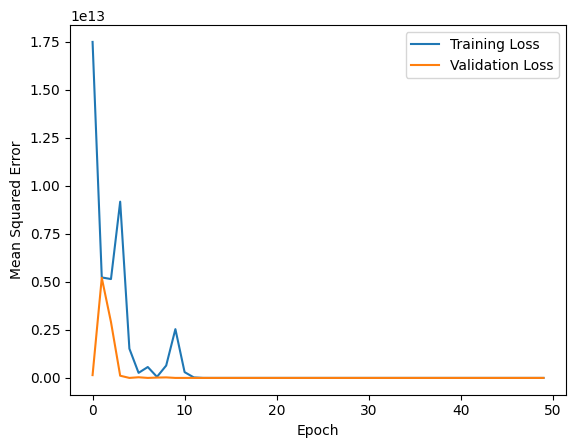

In [53]:
# Set up parameters
verbose = 0
num_epochs = 50  # Reduce epochs for faster training
callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n=10)]
validation_split = 0.2

# Measure training time
t0 = time.time()  # start time

# Train the model
history = nn_model.fit(X_train, y_train, epochs=num_epochs, verbose=verbose, callbacks=callbacks, validation_split=validation_split)

t1 = time.time()  # stop time
print('Elapsed time: %.2fs' % (t1 - t0))

# Evaluate the model
loss, mae = nn_model.model.evaluate(X_test, y_test)
print(f'Loss: {loss} Mean Absolute Error: {mae}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()